Initialisation and dependencies

In [7]:
!pip install roboflow torch ipywidgets ultralytics==8.3.40 sahi


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for ipywidgets from https://files.pythonhosted.org/packages/58/6a/9166369a2f092bd286d24e6307de555d63616e8ddb373ebad2b5635ca4cd/ipywidgets-8.1.7-py3-none-any.whl.metadata
  Obtaining dependency information for widgetsnbextension~=4.0.14 from https://files.pythonhosted.org/packages/ca/51/5447876806d1088a0f8f71e16542bf350918128d0a69437df26047c8e46f/widgetsnbextension-4.0.14-py3-none-any.whl.metadata
  Obtaining dependency information for jupyterlab_widgets~=3.0.15 from https://files.pythonhosted.org/packages/43/6a/ca128561b22b60bd5a0c4ea26649e68c8556b82bc70a0c396eebc977fe86/jupyterlab_widgets-3.0.15-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/139.8 kB ? eta -:--:--
   ----- --------------------------------- 20.5/139.8 kB 330.3 kB/s eta 0:00:01
   ----------- --------------------------- 41.0/139.8 kB 495.5 kB/s eta 0:00:01
   ----------- --------------------------- 41.0/139.8 kB 495.5 kB/s eta 0:00:01
   ----------- ---------


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import ultralytics
from ultralytics.utils.downloads import safe_download
ultralytics.checks()

from roboflow import Roboflow
import cv2
import os
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

Ultralytics 8.3.40  Python-3.11.1 torch-2.8.0+cpu CPU (Intel Core(TM) i5-10210U 1.60GHz)
Setup complete  (8 CPUs, 11.8 GB RAM, 428.3/475.8 GB disk)


In [6]:
rf = Roboflow(api_key="oVIBA8zpqqydIlbiINxs")
project = rf.workspace("astra").project("sahi-d8eje")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov11 in progress : 85.0%
Version export complete for yolov11 format


BadZipFile: File is not a zip file

Save image frames from video

In [5]:
cam = cv2.VideoCapture("C:\\Users\\Thunder\\Downloads\\sample.mp4")

try:
    if not os.path.exists('data'):
        os.makedirs('data')
except OSError:
    print ('Error: Creating directory of data')
currentframe = 0
while True:
    ret, frame = cam.read()
    if ret:
        # Define image file path
        name = f'./data/frame{currentframe}.jpg'

        # Save frame as image
        cv2.imwrite(name, frame)
        print(f'Creating... {name}')

        currentframe += 1
    else:
        break
cam.release()

Creating... ./data/frame0.jpg
Creating... ./data/frame1.jpg
Creating... ./data/frame2.jpg
Creating... ./data/frame3.jpg
Creating... ./data/frame4.jpg
Creating... ./data/frame5.jpg
Creating... ./data/frame6.jpg
Creating... ./data/frame7.jpg
Creating... ./data/frame8.jpg
Creating... ./data/frame9.jpg
Creating... ./data/frame10.jpg
Creating... ./data/frame11.jpg
Creating... ./data/frame12.jpg
Creating... ./data/frame13.jpg
Creating... ./data/frame14.jpg
Creating... ./data/frame15.jpg
Creating... ./data/frame16.jpg
Creating... ./data/frame17.jpg
Creating... ./data/frame18.jpg
Creating... ./data/frame19.jpg
Creating... ./data/frame20.jpg
Creating... ./data/frame21.jpg
Creating... ./data/frame22.jpg
Creating... ./data/frame23.jpg
Creating... ./data/frame24.jpg
Creating... ./data/frame25.jpg
Creating... ./data/frame26.jpg
Creating... ./data/frame27.jpg
Creating... ./data/frame28.jpg
Creating... ./data/frame29.jpg
Creating... ./data/frame30.jpg
Creating... ./data/frame31.jpg
Creating... ./data

Training Model using YoloV11

In [9]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='ultralytics',
    model_path="yolo11n.pt", # any yolov8/yolov9/yolo11/yolo12/rt-detr det model is supported
    confidence_threshold=0.35,
    device="cpu", # or 'cuda:0' if GPU is available
)
result = get_prediction("data/frame0.jpg", detection_model)

100%|██████████| 5.35M/5.35M [00:02<00:00, 2.01MB/s]


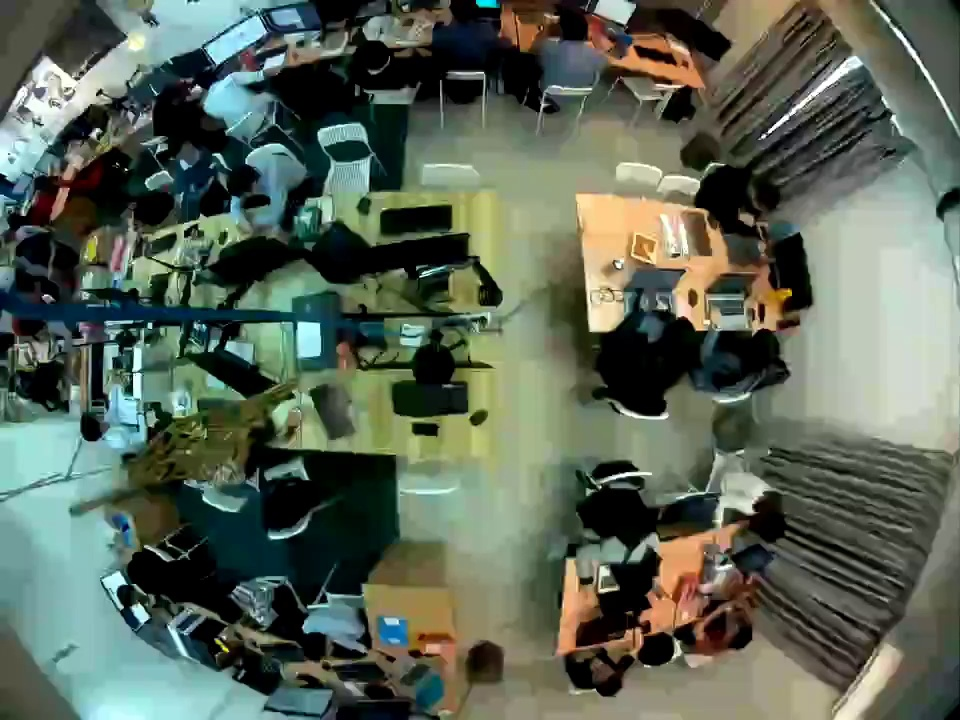

In [11]:
result.export_visuals(export_dir="data/", hide_conf=True)

Image("data/prediction_visual.png")

Sliced Inference (SAHI)

Performing prediction on 20 slices.


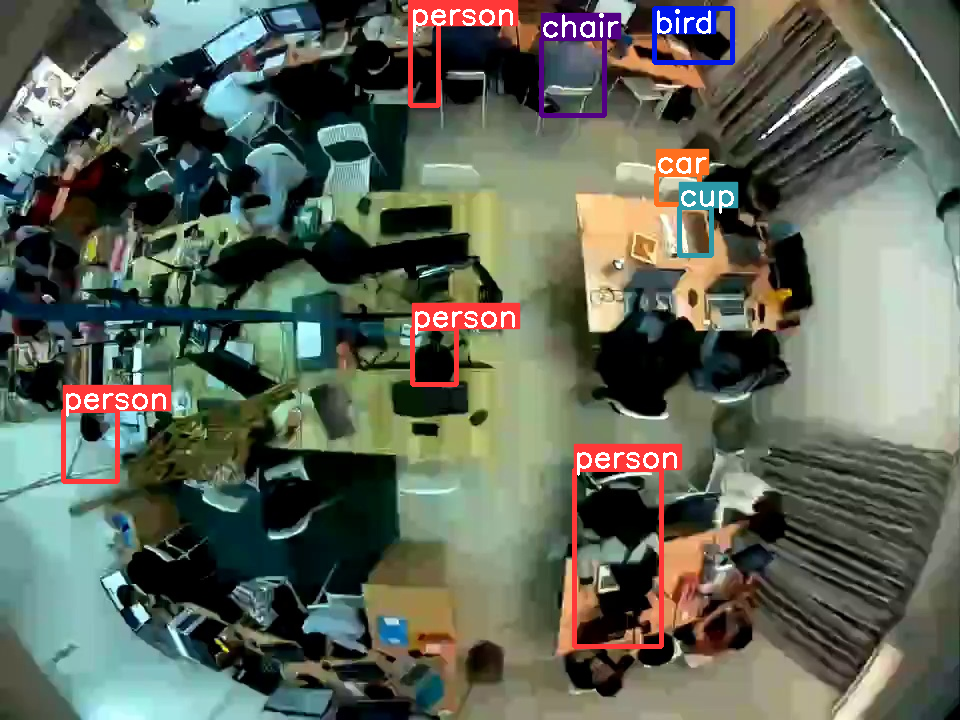

In [12]:
result = get_sliced_prediction(
    "data/frame0.jpg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)
result.export_visuals(export_dir="data/", hide_conf=True)

Image("data/prediction_visual.png")

In [24]:
model = ultralytics.YOLO('yolo11n.yaml')
results = model.train(data=r'C:\Users\Thunder\PycharmProjects\neural network\SAHI.v1i.yolov11\data.yaml', epochs=3)

New https://pypi.org/project/ultralytics/8.3.192 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.40  Python-3.11.1 torch-2.8.0+cpu CPU (Intel Core(TM) i5-10210U 1.60GHz)
engine\trainer: task=detect, mode=train, model=yolo11n.yaml, data=C:\Users\Thunder\PycharmProjects\neural network\SAHI.v1i.yolov11\data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None,

train: Scanning C:\Users\Thunder\PycharmProjects\neural network\SAHI.v1i.yolov11\train\labels.cache... 863 images, 327 backgrounds, 0 corrupt: 100%|██████████| 863/863 [00:00<?, ?it/s]
'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
val: Scanning C:\Users\Thunder\PycharmProjects\neural network\SAHI.v1i.yolov11\valid\labels.cache... 82 images, 32 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]

Plotting labels to C:\Users\Thunder\PycharmProjects\neural network\runs\detect\train7\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to C:\Users\Thunder\PycharmProjects\neural network\runs\detect\train7
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G     0.1532      110.8     0.1261          9        640: 100%|██████████| 54/54 [06:57<00:00,  7.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.84s/it]

                   all         82         50          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G     0.2954      66.28     0.2335          7        640: 100%|██████████| 54/54 [06:11<00:00,  6.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.35s/it]

                   all         82         50          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G     0.1973      49.51     0.2516         13        640: 100%|██████████| 54/54 [06:12<00:00,  6.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.58s/it]

                   all         82         50          0          0          0          0



3 epochs completed in 0.337 hours.
Optimizer stripped from C:\Users\Thunder\PycharmProjects\neural network\runs\detect\train7\weights\last.pt, 5.5MB
Optimizer stripped from C:\Users\Thunder\PycharmProjects\neural network\runs\detect\train7\weights\best.pt, 5.5MB

Validating C:\Users\Thunder\PycharmProjects\neural network\runs\detect\train7\weights\best.pt...
WARNING  validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.40  Python-3.11.1 torch-2.8.0+cpu CPU (Intel Core(TM) i5-10210U 1.60GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:11<00:00,  3.89s/it]

                   all         82         50          0          0          0          0


Speed: 1.8ms preprocess, 118.7ms inference, 0.0ms loss, 6.7ms postprocess per image
Results saved to C:\Users\Thunder\PycharmProjects\neural network\runs\detect\train7


In [23]:
import os
print(len(os.listdir(r"C:\Users\Thunder\PycharmProjects\neural network\SAHI.v1i.yolov11\train\images")))
print(len(os.listdir(r"C:\Users\Thunder\PycharmProjects\neural network\SAHI.v1i.yolov11\valid\images")))

863
82


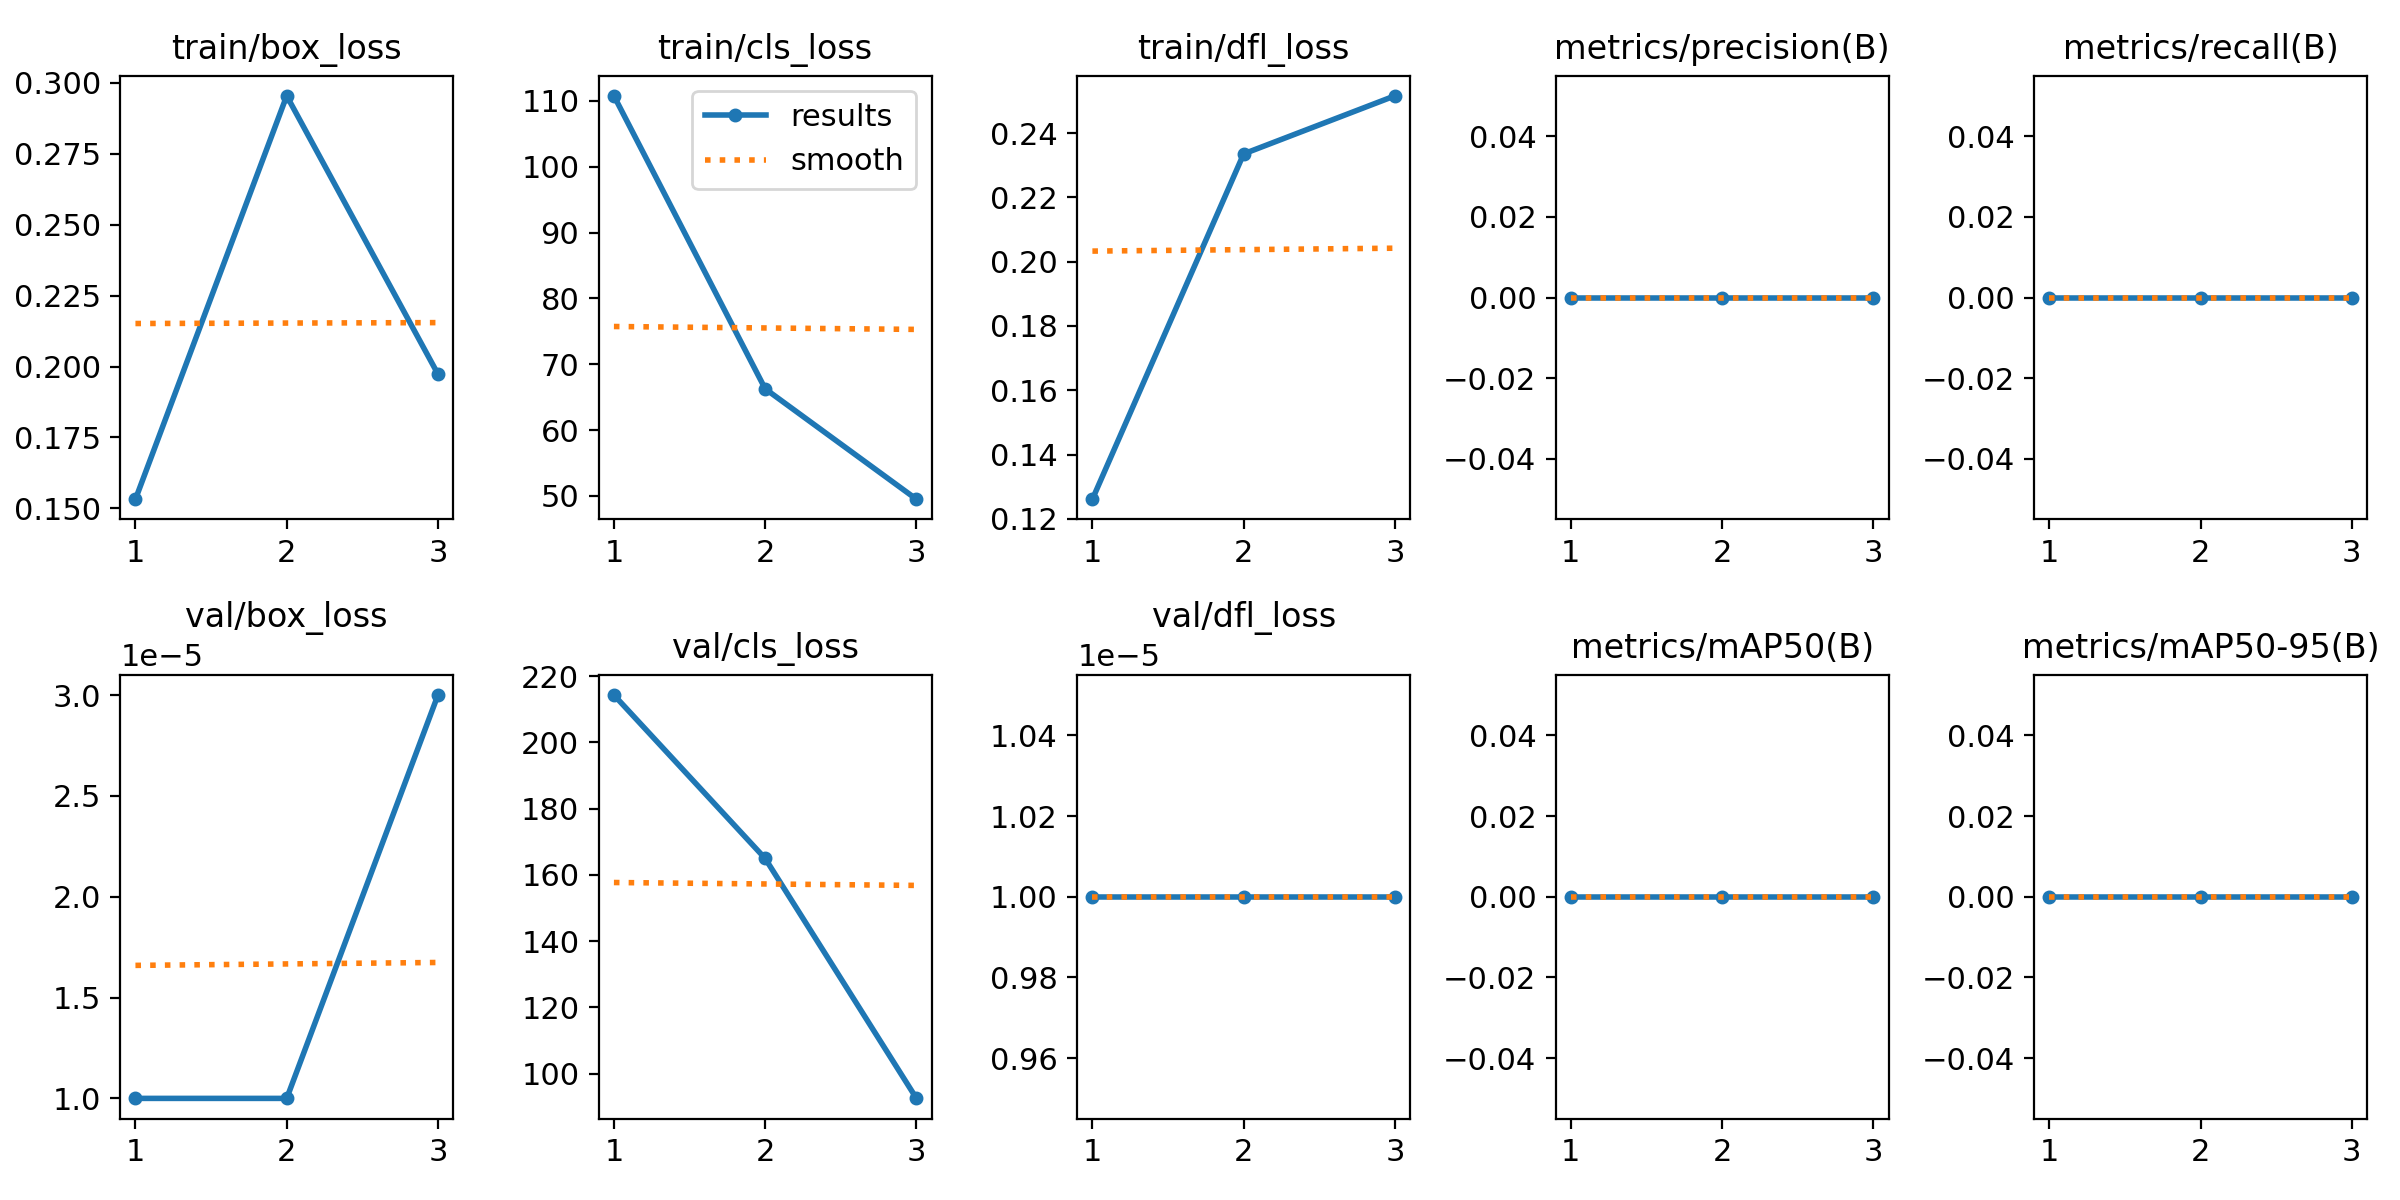

In [25]:
from IPython.display import Image
Image(filename="runs/detect/train7/results.png")

In [29]:
results = model.predict(source="SAHI.v1i.yolov11/train/images", save=True, conf=0.25)


image 1/863 C:\Users\Thunder\PycharmProjects\neural network\SAHI.v1i.yolov11\train\images\frame1010_jpg.rf.189bd5738d1eb6b0c26692faa1e84274.jpg: 640x640 (no detections), 114.5ms
image 2/863 C:\Users\Thunder\PycharmProjects\neural network\SAHI.v1i.yolov11\train\images\frame1010_jpg.rf.c055745fecb467e91cb752db2ca070a4.jpg: 640x640 (no detections), 121.6ms
image 3/863 C:\Users\Thunder\PycharmProjects\neural network\SAHI.v1i.yolov11\train\images\frame1010_jpg.rf.e6adbcfc57e446c6b6d2f36b8f62964a.jpg: 640x640 (no detections), 109.7ms
image 4/863 C:\Users\Thunder\PycharmProjects\neural network\SAHI.v1i.yolov11\train\images\frame1012_jpg.rf.2f1cfe62d8862f65f624ca7038805564.jpg: 640x640 (no detections), 135.7ms
image 5/863 C:\Users\Thunder\PycharmProjects\neural network\SAHI.v1i.yolov11\train\images\frame1012_jpg.rf.b9ddaac920b29d5edc14c2bb3a2f0fe7.jpg: 640x640 (no detections), 112.4ms
image 6/863 C:\Users\Thunder\PycharmProjects\neural network\SAHI.v1i.yolov11\train\images\frame1012_jpg.rf.db

In [32]:
import cv2
import os

# Path where your images are saved
image_folder = r"runs/detect/train72"
output_video = "output_video.mp4"

# Collect all image filenames (jpg and png)
images = [img for img in os.listdir(image_folder) if img.lower().endswith((".jpg", ".png"))]
images.sort()  # ensure correct order

# Check if there are images
if len(images) == 0:
    raise ValueError("No images found in the folder!")

# Read first image to get frame size
first_frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = first_frame.shape

# Define video writer (mp4 with H.264 codec)
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
video = cv2.VideoWriter(output_video, fourcc, 10, (width, height))  # 10 fps

# Write images to video
for image in images:
    frame = cv2.imread(os.path.join(image_folder, image))
    video.write(frame)

video.release()

print(f"Video saved as {output_video}")

Video saved as output_video.mp4


In [12]:
import cv2
from pathlib import Path
from sahi import AutoDetectionModel
from sahi.predict import get_sliced_prediction

# Configuration
model_path = "runs/detect/train7/weights/best.pt"
input_folder = Path("SAHI.v1i.yolov11/valid/images")
output_folder = Path("sahi_results")
output_folder.mkdir(exist_ok=True)
video_output = "sahi_results_video.mp4"
fps = 10

# Load model
detection_model = AutoDetectionModel.from_pretrained(
    model_type="yolov11",
    model_path=model_path,
    confidence_threshold=0.3,
    device="cuda"
)

# -----------------------------
# 1. Run SAHI on all images
# -----------------------------
# Loop through each image
for idx, img_path in enumerate(sorted(input_folder.glob("*.[jp][pn]g"))):
    print(f"Processing {img_path.name} ...")

    # Run sliced prediction
    result = get_sliced_prediction(
        str(img_path),
        detection_model,
        slice_height=80,
        slice_width=80,
        overlap_height_ratio=0.2,
        overlap_width_ratio=0.2
    )

    # Export visuals (SAHI saves the annotated image)
    result.export_visuals(export_dir=output_folder)

    # Immediately rename the exported image
    # SAHI usually saves ONE image per input, matching the stem
    exported_files = list(output_folder.glob("prediction_visual.png"))
    if len(exported_files) == 0:
        raise ValueError(f"No exported image found for prediction_visual.png")

    # Rename immediately after export
    custom_name = f"frame_{idx:04d}.jpg"
    exported_files[0].rename(output_folder / custom_name)
    print(f"Saved annotated image as {custom_name}")


# -----------------------------
# 2. Collect all exported images
# -----------------------------
annotated_images = sorted([str(p) for p in output_folder.glob("*.[jp][pn]g")])

if len(annotated_images) == 0:
    raise ValueError("No annotated images found to compile into video!")

# -----------------------------
# 3. Compile video
# -----------------------------
first_frame = cv2.imread(annotated_images[0])
height, width, layers = first_frame.shape

fourcc = cv2.VideoWriter_fourcc(*"mp4v")
video_writer = cv2.VideoWriter(video_output, fourcc, fps, (width, height))

for img_path in annotated_images:
    frame = cv2.imread(img_path)
    video_writer.write(frame)

video_writer.release()
print(f"Video saved as {video_output}")


Processing frame1019_jpg.rf.0ca834a40311923f37da00ab6e3e702e.jpg ...
Performing prediction on 100 slices.
Saved annotated image as frame_0000.jpg
Processing frame1060_jpg.rf.d8b87941e4ce163368b2894c0b1c2dc4.jpg ...
Performing prediction on 100 slices.
Saved annotated image as frame_0001.jpg
Processing frame1061_jpg.rf.72e999a98454d2ed672f1794fea4e505.jpg ...
Performing prediction on 100 slices.
Saved annotated image as frame_0002.jpg
Processing frame1062_jpg.rf.70047c41783eb5ffb9a23a96af82bb07.jpg ...
Performing prediction on 100 slices.
Saved annotated image as frame_0003.jpg
Processing frame1064_jpg.rf.93e41107dd15290c10932358ce7de6aa.jpg ...
Performing prediction on 100 slices.
Saved annotated image as frame_0004.jpg
Processing frame1066_jpg.rf.bd28618aa05eacb8b0172326b4cf724a.jpg ...
Performing prediction on 100 slices.
Saved annotated image as frame_0005.jpg
Processing frame1067_jpg.rf.97bb77827140696f1cdc37e259a796e4.jpg ...
Performing prediction on 100 slices.
Saved annotated im

In [34]:
!pip install -U scikit-image imagecodecs

  Obtaining dependency information for scikit-image from https://files.pythonhosted.org/packages/de/ec/b57c500ee85885df5f2188f8bb70398481393a69de44a00d6f1d055f103c/scikit_image-0.25.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for imagecodecs from https://files.pythonhosted.org/packages/10/27/0254f64a1d759f22f2c3add691ef915bba016aa7b3630192bbaa9ce1d65d/imagecodecs-2025.8.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for imageio!=2.35.0,>=2.33 from https://files.pythonhosted.org/packages/cb/bd/b394387b598ed84d8d0fa90611a90bee0adc2021820ad5729f7ced74a8e2/imageio-2.37.0-py3-none-any.whl.metadata
  Obtaining dependency information for tifffile>=2022.8.12 from https://files.pythonhosted.org/packages/56/b3/23eec760215910609914dd99aba23ce1c72a3bcbe046ee44f45adf740452/tifffile-2025.8.28-py3-none-any.whl.metadata
  Obtaining dependency information for lazy-loader>=0.4 from https://files.pythonhosted.org/packages/83/60/d497a310bde3f01cb805196a


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
